In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import scipy.stats as sci
import pickle
from sklearn.metrics import accuracy_score

In [ ]:
pokemon = pd.read_csv('Data/ML_PokeData.csv')
combats = pd.read_csv('Data/combats.csv')

In [ ]:
cols = ["First_pokemon","Second_pokemon","Winner"]
new_combat_data=combats[cols].replace(pokemon.name)
new_combat_data.head()

,First_pokemon,Second_pokemon,Winner
0,Beautifly,Nosepass,Nosepass
1,Carbink,Dedenne,Dedenne
2,Sunflora,Flabébé,Flabébé
3,Smoochum,Swirlix,Swirlix
4,Chikorita,Donphan,Chikorita


In [ ]:
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1
combats.head(10)

,First_pokemon,Second_pokemon,Winner
0,266,298,1
1,702,701,1
2,191,668,1
3,237,683,1
4,151,231,0
5,657,752,0
6,192,134,1
7,73,545,1
8,220,763,1
9,302,31,1


In [ ]:
pokemon.head(10)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,Ability__Intimidate,Ability__Keen Eye,Ability__Levitate,Ability__Other,Ability__Overgrow,Ability__Pressure,Ability__Sturdy,Ability__Swarm,Ability__Swift Swim,Ability__Torrent
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,0,0,0,1,0,0,0,0,0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
5,0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,...,0,0,0,0,0,0,0,0,0,0
6,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0,0,0,0,0,0,0,0,0,1
7,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0,0,0,0,0,0,0,0,0,1
8,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0,0,0,0,0,0,0,0,0,1
9,1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df = pd.merge(combats,pokemon,left_on='First_pokemon',right_on='pokedex_number')
df = pd.merge(df,pokemon,left_on='Second_pokemon',right_on='pokedex_number',suffixes=['_1','_2'])
df.head(10)

,First_pokemon,Second_pokemon,Winner,against_bug_1,against_dark_1,against_dragon_1,against_electric_1,against_fairy_1,against_fight_1,against_fire_1,...,Ability__Intimidate_2,Ability__Keen Eye_2,Ability__Levitate_2,Ability__Other_2,Ability__Overgrow_2,Ability__Pressure_2,Ability__Sturdy_2,Ability__Swarm_2,Ability__Swift Swim_2,Ability__Torrent_2
0,266,298,1,1.00,1.0,1.0,1.0,1.0,0.5,2.0,...,0,0,0,1,0,0,0,0,0,0
1,73,298,1,0.50,1.0,1.0,2.0,0.5,0.5,0.5,...,0,0,0,1,0,0,0,0,0,0
2,373,298,1,0.50,1.0,2.0,1.0,2.0,0.5,0.5,...,0,0,0,1,0,0,0,0,0,0
3,536,298,0,1.00,1.0,1.0,0.0,1.0,1.0,0.5,...,0,0,0,1,0,0,0,0,0,0
4,368,298,0,1.00,1.0,1.0,2.0,1.0,1.0,0.5,...,0,0,0,1,0,0,0,0,0,0
5,659,298,1,1.00,1.0,1.0,1.0,1.0,2.0,1.0,...,0,0,0,1,0,0,0,0,0,0
6,736,298,0,1.00,1.0,1.0,1.0,1.0,0.5,2.0,...,0,0,0,1,0,0,0,0,0,0
7,638,298,0,0.25,0.5,0.5,1.0,1.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,0
8,129,298,0,1.00,1.0,1.0,2.0,1.0,1.0,0.5,...,0,0,0,1,0,0,0,0,0,0
9,517,298,1,2.00,2.0,1.0,1.0,1.0,0.5,1.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
for x in sorted(df.columns):
    print(x)

Abilities_Counts_1
Abilities_Counts_2
Ability__Blaze_1
Ability__Blaze_2
Ability__Chlorophyll_1
Ability__Chlorophyll_2
Ability__Intimidate_1
Ability__Intimidate_2
Ability__Keen Eye_1
Ability__Keen Eye_2
Ability__Levitate_1
Ability__Levitate_2
Ability__Other_1
Ability__Other_2
Ability__Overgrow_1
Ability__Overgrow_2
Ability__Pressure_1
Ability__Pressure_2
Ability__Sturdy_1
Ability__Sturdy_2
Ability__Swarm_1
Ability__Swarm_2
Ability__Swift Swim_1
Ability__Swift Swim_2
Ability__Torrent_1
Ability__Torrent_2
First_pokemon
Second_pokemon
Type1_bug_1
Type1_bug_2
Type1_dark_1
Type1_dark_2
Type1_dragon_1
Type1_dragon_2
Type1_electric_1
Type1_electric_2
Type1_fairy_1
Type1_fairy_2
Type1_fighting_1
Type1_fighting_2
Type1_fire_1
Type1_fire_2
Type1_flying_1
Type1_flying_2
Type1_ghost_1
Type1_ghost_2
Type1_grass_1
Type1_grass_2
Type1_ground_1
Type1_ground_2
Type1_ice_1
Type1_ice_2
Type1_normal_1
Type1_normal_2
Type1_poison_1
Type1_poison_2
Type1_psychic_1
Type1_psychic_2
Type1_rock_1
Type1_rock_2
Typ

In [ ]:
cols = ['First_pokemon','Second_pokemon','name_1','name_2','pokedex_number_1','pokedex_number_2','Type1_bug_1', 'Type1_dark_1', 'Type1_dragon_1',
       'Type1_electric_1', 'Type1_fairy_1', 'Type1_fighting_1', 'Type1_fire_1',
       'Type1_flying_1', 'Type1_ghost_1', 'Type1_grass_1', 'Type1_ground_1',
       'Type1_ice_1', 'Type1_normal_1', 'Type1_poison_1', 'Type1_psychic_1',
       'Type1_rock_1', 'Type1_steel_1', 'Type1_water_1', 'Type2_None_1', 'Type2_bug_1',
       'Type2_dark_1', 'Type2_dragon_1', 'Type2_electric_1', 'Type2_fairy_1',
       'Type2_fighting_1', 'Type2_fire_1', 'Type2_flying_1', 'Type2_ghost_1',
       'Type2_grass_1', 'Type2_ground_1', 'Type2_ice_1', 'Type2_normal_1',
       'Type2_poison_1', 'Type2_psychic_1', 'Type2_rock_1', 'Type2_steel_1',
       'Type2_water_1','Type1_bug_2', 'Type1_dark_2', 'Type1_dragon_2',
       'Type1_electric_2', 'Type1_fairy_2', 'Type1_fighting_2', 'Type1_fire_2',
       'Type1_flying_2', 'Type1_ghost_2', 'Type1_grass_2', 'Type1_ground_2',
       'Type1_ice_2', 'Type1_normal_2', 'Type1_poison_2', 'Type1_psychic_2',
       'Type1_rock_2', 'Type1_steel_2', 'Type1_water_2', 'Type2_None_2', 'Type2_bug_2',
       'Type2_dark_2', 'Type2_dragon_2', 'Type2_electric_2', 'Type2_fairy_2',
       'Type2_fighting_2', 'Type2_fire_2', 'Type2_flying_2', 'Type2_ghost_2',
       'Type2_grass_2', 'Type2_ground_2', 'Type2_ice_2', 'Type2_normal_2',
       'Type2_poison_2', 'Type2_psychic_2', 'Type2_rock_2', 'Type2_steel_2',
       'Type2_water_2','base_egg_steps_1',
       'base_happiness_1','experience_growth_1','base_egg_steps_2',
       'base_happiness_2','experience_growth_2','is_legendary_1','is_legendary_2','generation_2','generation_1',
        'Ability__Blaze_1', 'Ability__Blaze_2', 'Ability__Chlorophyll_1', 'Ability__Chlorophyll_2', 'Ability__Intimidate_1', 'Ability__Intimidate_2',
        'Ability__Keen Eye_1', 'Ability__Keen Eye_2', 'Ability__Levitate_1', 'Ability__Levitate_2', 'Ability__Other_1', 'Ability__Other_2', 'Ability__Overgrow_1',
        'Ability__Overgrow_2', 'Ability__Pressure_1', 'Ability__Pressure_2', 'Ability__Sturdy_1', 'Ability__Sturdy_2', 'Ability__Swarm_1', 'Ability__Swarm_2',
        'Ability__Swift Swim_1', 'Ability__Swift Swim_2', 'Ability__Torrent_1', 'Ability__Torrent_2']
df_sub = df.drop(columns=cols)
df_sub.shape

(50000, 53)

In [ ]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

In [ ]:
x_label=df_sub.drop("Winner",axis=1)
y_label=df_sub["Winner"]

In [ ]:
x_label.columns

Index(['against_bug_1', 'against_dark_1', 'against_dragon_1',
       'against_electric_1', 'against_fairy_1', 'against_fight_1',
       'against_fire_1', 'against_flying_1', 'against_ghost_1',
       'against_grass_1', 'against_ground_1', 'against_ice_1',
       'against_normal_1', 'against_poison_1', 'against_psychic_1',
       'against_rock_1', 'against_steel_1', 'against_water_1', 'attack_1',
       'base_total_1', 'defense_1', 'hp_1', 'sp_attack_1', 'sp_defense_1',
       'speed_1', 'Abilities_Counts_1', 'against_bug_2', 'against_dark_2',
       'against_dragon_2', 'against_electric_2', 'against_fairy_2',
       'against_fight_2', 'against_fire_2', 'against_flying_2',
       'against_ghost_2', 'against_grass_2', 'against_ground_2',
       'against_ice_2', 'against_normal_2', 'against_poison_2',
       'against_psychic_2', 'against_rock_2', 'against_steel_2',
       'against_water_2', 'attack_2', 'base_total_2', 'defense_2', 'hp_2',
       'sp_attack_2', 'sp_defense_2', 'speed_2', '

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.20, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAINING SET METRICS
[[ 5744 13054]
 [ 5235 15967]]
              precision    recall  f1-score   support

           0       0.52      0.31      0.39     18798
           1       0.55      0.75      0.64     21202

    accuracy                           0.54     40000
   macro avg       0.54      0.53      0.51     40000
weighted avg       0.54      0.54      0.52     40000


TESTING SET METRICS
[[1462 3341]
 [1315 3882]]
              precision    recall  f1-score   support

           0       0.53      0.30      0.39      4803
           1       0.54      0.75      0.63      5197

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.51     10000
weighted avg       0.53      0.53      0.51     10000



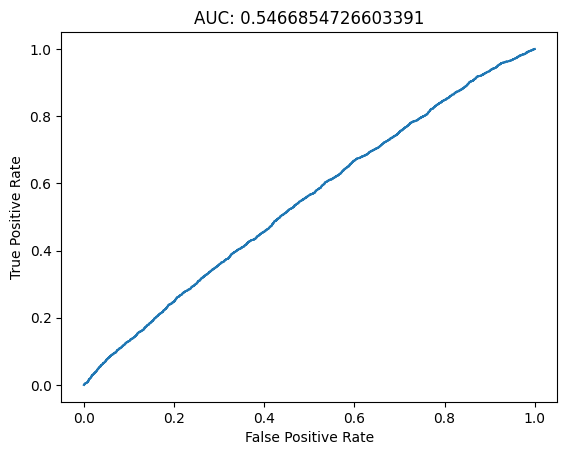

In [ ]:
lr = LogisticRegression()
doMLClassification(lr, x_train, y_train, x_test, y_test)

TRAINING SET METRICS
[[18793     5]
 [    2 21200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18798
           1       1.00      1.00      1.00     21202

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000


TESTING SET METRICS
[[3640 1163]
 [ 974 4223]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      4803
           1       0.78      0.81      0.80      5197

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



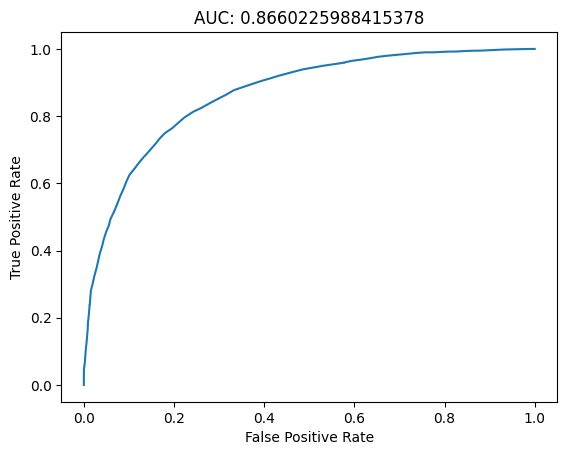

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
doMLClassification(clf, x_train, y_train, x_test, y_test)

[LightGBM] [Info] Number of positive: 21202, number of negative: 18798
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1912
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530050 -> initscore=0.120345
[LightGBM] [Info] Start training from score 0.120345
TRAINING SET METRICS
[[15060  3738]
 [ 2803 18399]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     18798
           1       0.83      0.87      0.85     21202

    accuracy                           0.84     40000
   macro avg       0.84      0.83      0.84     40000
weighted avg       0.84      0.84      0.84     40000


TESTING SET METRICS
[[3718 1085]
 [ 767 4430]]
              

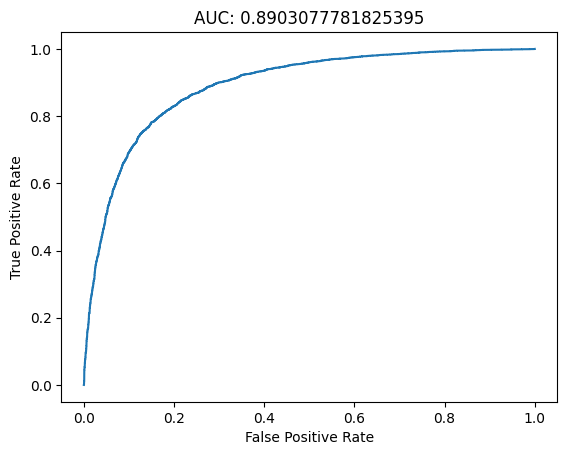

In [ ]:
lgb = LGBMClassifier(random_state=42, n_estimators=100)
doMLClassification(lgb, x_train, y_train, x_test, y_test)

In [ ]:
sorted(list(zip(lgb.feature_importances_, x_label.columns)), reverse=True)

[(177, 'defense_1'),
 (176, 'speed_1'),
 (160, 'hp_1'),
 (157, 'base_total_1'),
 (151, 'sp_attack_1'),
 (150, 'base_total_2'),
 (146, 'speed_2'),
 (144, 'attack_2'),
 (143, 'sp_attack_2'),
 (133, 'attack_1'),
 (131, 'sp_defense_2'),
 (130, 'defense_2'),
 (128, 'hp_2'),
 (121, 'sp_defense_1'),
 (47, 'against_bug_2'),
 (41, 'against_water_1'),
 (39, 'against_fight_1'),
 (38, 'against_fight_2'),
 (38, 'against_bug_1'),
 (38, 'Abilities_Counts_1'),
 (37, 'Abilities_Counts_2'),
 (36, 'against_grass_1'),
 (35, 'against_ice_1'),
 (34, 'against_ice_2'),
 (34, 'against_fire_1'),
 (34, 'against_electric_2'),
 (32, 'against_fire_2'),
 (32, 'against_electric_1'),
 (29, 'against_steel_2'),
 (27, 'against_poison_2'),
 (27, 'against_dark_2'),
 (26, 'against_rock_1'),
 (26, 'against_dragon_1'),
 (23, 'against_grass_2'),
 (23, 'against_flying_2'),
 (21, 'against_ground_1'),
 (21, 'against_dragon_2'),
 (20, 'against_rock_2'),
 (19, 'against_poison_1'),
 (18, 'against_ghost_1'),
 (18, 'against_flying_1')

TRAINING SET METRICS
[[16529  2269]
 [ 1948 19254]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     18798
           1       0.89      0.91      0.90     21202

    accuracy                           0.89     40000
   macro avg       0.89      0.89      0.89     40000
weighted avg       0.89      0.89      0.89     40000


TESTING SET METRICS
[[3894  909]
 [ 733 4464]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      4803
           1       0.83      0.86      0.84      5197

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000



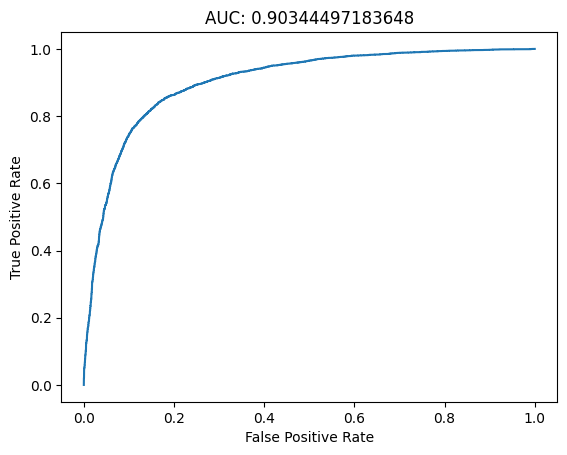

In [ ]:
xgb = XGBClassifier(random_state=42, n_estimators=100)
doMLClassification(xgb, x_train, y_train, x_test, y_test)

In [ ]:
sorted(list(zip(xgb.feature_importances_, x_label.columns)), reverse=True)

[(0.030931372, 'against_flying_1'),
 (0.028438594, 'against_rock_1'),
 (0.027178068, 'against_fire_1'),
 (0.024934767, 'base_total_2'),
 (0.02466401, 'against_poison_2'),
 (0.024395628, 'against_water_1'),
 (0.024301242, 'against_rock_2'),
 (0.02422879, 'against_dragon_2'),
 (0.023221614, 'base_total_1'),
 (0.023107648, 'against_dark_1'),
 (0.022040594, 'attack_1'),
 (0.021479435, 'against_normal_2'),
 (0.02137811, 'speed_2'),
 (0.021168863, 'Abilities_Counts_2'),
 (0.020988254, 'attack_2'),
 (0.020885615, 'against_normal_1'),
 (0.020862566, 'hp_2'),
 (0.020628897, 'sp_attack_2'),
 (0.020418406, 'hp_1'),
 (0.020318156, 'against_electric_1'),
 (0.020282045, 'against_fight_2'),
 (0.020202976, 'speed_1'),
 (0.02018147, 'sp_attack_1'),
 (0.01970528, 'sp_defense_1'),
 (0.01957385, 'against_psychic_2'),
 (0.019496368, 'Abilities_Counts_1'),
 (0.019283924, 'against_flying_2'),
 (0.019005513, 'against_fairy_2'),
 (0.01896457, 'defense_1'),
 (0.018174503, 'against_ground_1'),
 (0.017773522, 'ag

In [ ]:
pickle.dump(gb , open('pokemon-battle-model(gb).sav', 'wb'))

TRAINING SET METRICS
[[10401  8397]
 [ 3481 17721]]
              precision    recall  f1-score   support

           0       0.75      0.55      0.64     18798
           1       0.68      0.84      0.75     21202

    accuracy                           0.70     40000
   macro avg       0.71      0.69      0.69     40000
weighted avg       0.71      0.70      0.70     40000


TESTING SET METRICS
[[2561 2242]
 [ 920 4277]]
              precision    recall  f1-score   support

           0       0.74      0.53      0.62      4803
           1       0.66      0.82      0.73      5197

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.67     10000
weighted avg       0.69      0.68      0.68     10000



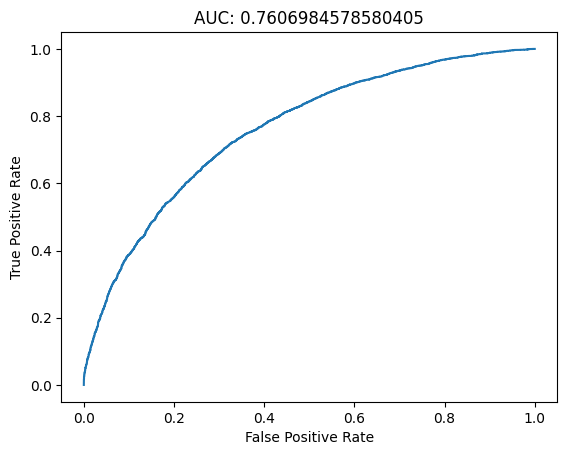

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
doMLClassification(gb, x_train, y_train, x_test, y_test)

In [ ]:
sorted(list(zip(gb.feature_importances_, x_label.columns)), reverse=True)

[(0.06212548733014061, 'base_total_2'),
 (0.061934685451582754, 'sp_attack_1'),
 (0.060437038186408526, 'hp_1'),
 (0.05553954573316062, 'sp_attack_2'),
 (0.05442339639281369, 'sp_defense_2'),
 (0.05057947090638692, 'speed_1'),
 (0.04871689908773893, 'attack_1'),
 (0.04797545288967138, 'base_total_1'),
 (0.044373951979385866, 'hp_2'),
 (0.04243258621246059, 'defense_1'),
 (0.04094997360455827, 'sp_defense_1'),
 (0.03984985723068585, 'attack_2'),
 (0.036485351389984114, 'speed_2'),
 (0.024483493005544307, 'defense_2'),
 (0.021715905786974212, 'against_electric_1'),
 (0.021609457395090022, 'against_rock_1'),
 (0.018641055718520382, 'against_dragon_1'),
 (0.018326396548069335, 'against_ice_2'),
 (0.017372592539407348, 'against_water_1'),
 (0.01720617403649427, 'against_fire_1'),
 (0.014233775034151864, 'against_rock_2'),
 (0.012198557720901433, 'against_ice_1'),
 (0.011994228246192553, 'against_water_2'),
 (0.011373068752571462, 'against_ground_2'),
 (0.010952873924332914, 'Abilities_Count